# Looking at all things SVM's using sklearn

In [42]:
from sklearn.svm import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

## Linear SVM

We will first look at linear SVMs using sklearn using the iris data set. First we will load the data then extract only the petal lengths/widths and make it a binary classifaction of either a Iris virginica flower or not.

In [57]:
# Store the iris data loader
iris = load_iris()
# Extract petal lengths and widths from data 
X = iris["data"][: ,(2,3)]
# Make the target values a binary classification problem as either a Iris Viriginica flower or not.
y = (iris["target"] == 2).astype(np.float64)

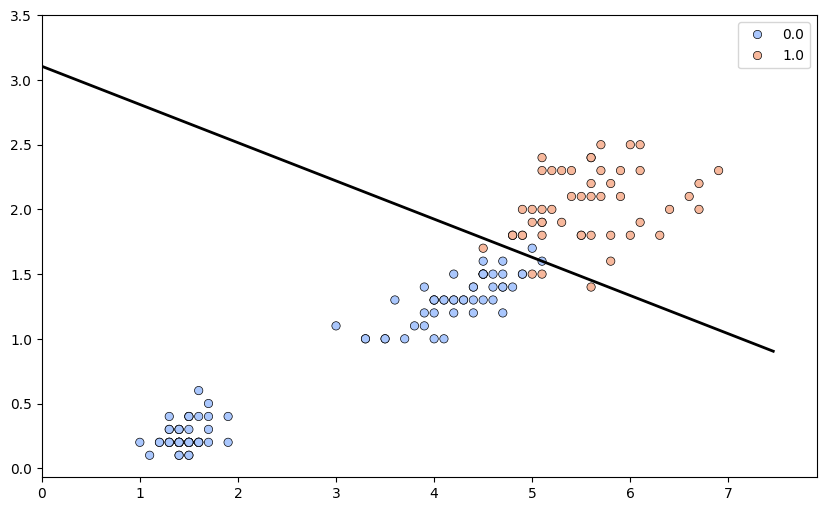

In [58]:
# Create a data pipline, first scaling and then applying a Linear SVC 
svm_linear_pip = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss = "hinge"))
])

# Fit the data using the pipe line
svm_linear_pip.fit(X, y)

# Extract the LinearSVC object
svc_linar = svm_linear_pip["linear_svc"]
# Extract the StandardScaler Object
scaler = svm_linear_pip.named_steps["scaler"]

# Extract the svc's coefficents
coef = svc_linar.coef_
# Extract the svc's intercept
intercept = svc_linar.intercept_

# Create mesh grids
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = abs(X[:, 1].min() - 1), X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

xy_grid = np.c_[xx.ravel(), yy.ravel()]

# Scale the mesh grid
xy_grid_scaled = scaler.transform(xy_grid)

# Calculate the decession boundry
Z = np.dot(xy_grid_scaled, coef[0]) + intercept
Z = Z.reshape(xx.shape)

# Create figure
plt.figure(figsize=(10, 6))

# Plot points
sb.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor='k')

# Plot decision boundry
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
